## Visualization of all training runs

In [2]:
# find files recursively
from glob import glob

# parse tb files
from tbparse import SummaryReader

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# searching df rows with np.where()
import numpy as np

In [3]:
# recursively read tensorboard files
tb_files = []
for filename in glob('**/events.out.tfevents.*', recursive=True):
    tb_files.append(filename)

display(tb_files)   

['lr5e-4_tau5e-3_gamma99e-2/solarcomfort5/tensorboard_logs/SAC_1/events.out.tfevents.1707209199.v100gpu2.1259290.0',
 'lr5e-4_tau5e-3_gamma99e-2/custom8/tensorboard_logs/SAC_1/events.out.tfevents.1707120557.v100gpu14.4093226.0',
 'lr5e-4_tau5e-3_gamma99e-2/solarcomfort3/tensorboard_logs/SAC_1/events.out.tfevents.1707208459.v100gpu13.2720863.0',
 'lr5e-4_tau5e-3_gamma99e-2/energy8/tensorboard_logs/SAC_1/events.out.tfevents.1707195202.v100gpu17.4162665.0',
 'lr5e-4_tau5e-3_gamma99e-2/energy3/tensorboard_logs/SAC_1/events.out.tfevents.1707121416.v100gpu15.2618141.0',
 'lr5e-4_tau5e-3_gamma99e-2/custom3/tensorboard_logs/SAC_1/events.out.tfevents.1707114224.v100gpu20.2123424.0',
 'lr5e-4_tau5e-3_gamma99e-2/solarcomfort8/tensorboard_logs/SAC_1/events.out.tfevents.1707211640.v100gpu12.3511156.0',
 'lr5e-4_tau5e-3_gamma99e-2/energy5/tensorboard_logs/SAC_1/events.out.tfevents.1707190129.v100gpu10.1159632.0',
 'lr5e-4_tau5e-3_gamma99e-2/custom5/tensorboard_logs/SAC_1/events.out.tfevents.17071199

In [4]:
# reader = SummaryReader(tb_files, pivot = True, extra_columns = {'dir_name'})
reader = SummaryReader(".", pivot = True, extra_columns = {'dir_name'})
df = reader.scalars
df

In [ ]:
sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/ep_rew_mean", hue = "dir_name")

NameError: name 'sns' is not defined

In [4]:
# display(df[df["dir_name"].str.match("custom")])
df = df.replace({"./tensorboard_logs.*": ""}, regex = True)
for lr in ["lr1e-4", "lr3e-4", "lr5e-4"]:
    # df["lr"] = np.where(df["dir_name"].str.contains(lr), float(lr[2:]))
    df.loc[df["dir_name"].str.contains(lr), 'lr'] = float(lr[2:])
for gamma in ["gamma99e-2"]:
    df["gamma"] = np.where(df["dir_name"].str.contains(gamma), float(gamma[5:]), None)
for tau in ["tau5e-3"]:
    df["tau"] = np.where(df["dir_name"].str.contains(tau), float(tau[3:]), None)
    
# display(df[df["dir_name"].str.contains("custom")])
# display(df["rollout/ep_rew_mean"])
df

,step,Comfort,Emissions,Grid,Resilience,all-time peak (a),carbon emissions (g),daily peak (d),eval/mean_ep_length,eval/mean_reward,...,train/actor_loss,train/critic_loss,train/ent_coef,train/ent_coef_loss,train/learning_rate,unmet hours of thermal comfort (u),dir_name,lr,gamma,tau
0,3595,-150.600006,-57.705914,-483.547150,-3.516894,-21.212978,-577.059143,-116.968384,NaN,NaN,...,-62.657700,8.231201,0.706551,-5.071311,0.0001,-502.000000,lr1e-4_tau5e-3_gamma99e-2/custom,0.0001,0.99,0.005
1,7190,-141.399994,-53.805874,-455.200653,-3.381247,-18.244812,-538.058716,-163.244217,NaN,NaN,...,-86.342545,173.717758,0.496081,-9.474817,0.0001,-471.333344,lr1e-4_tau5e-3_gamma99e-2/custom,0.0001,0.99,0.005
2,10785,-139.699997,-53.660519,-482.645966,-3.329578,-20.820049,-536.605225,-161.585754,NaN,NaN,...,-88.380203,5.870722,0.348495,-13.653634,0.0001,-465.666656,lr1e-4_tau5e-3_gamma99e-2/custom,0.0001,0.99,0.005
3,14380,-141.600006,-53.821251,-454.131561,-3.320956,-17.688181,-538.212463,-90.294235,NaN,NaN,...,-77.084770,8.841473,0.244236,-17.673691,0.0001,-472.000000,lr1e-4_tau5e-3_gamma99e-2/custom,0.0001,0.99,0.005
4,17975,-137.600006,-52.523163,-454.138092,-3.280971,-19.621881,-525.231628,-255.248901,NaN,NaN,...,-61.829216,34.217239,0.171185,-20.273895,0.0001,-458.666656,lr1e-4_tau5e-3_gamma99e-2/custom,0.0001,0.99,0.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35662,3947310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,565.908264,1.046268,0.034752,-0.928280,0.0005,NaN,lr5e-4_tau5e-3_gamma99e-2/solarcomfort,0.0005,0.99,0.005
35663,3950905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,547.778015,0.944860,0.034604,-0.957154,0.0005,NaN,lr5e-4_tau5e-3_gamma99e-2/solarcomfort,0.0005,0.99,0.005
35664,3954500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,549.214233,0.470212,0.035027,0.320713,0.0005,NaN,lr5e-4_tau5e-3_gamma99e-2/solarcomfort,0.0005,0.99,0.005
35665,3958095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,542.810425,0.881458,0.034762,1.200021,0.0005,NaN,lr5e-4_tau5e-3_gamma99e-2/solarcomfort,0.0005,0.99,0.005


In [5]:
display(df["dir_name"].unique())

array(['lr1e-4_tau5e-3_gamma99e-2/custom',
       'lr1e-4_tau5e-3_gamma99e-2/energy',
       'lr1e-4_tau5e-3_gamma99e-2/solarcomfort',
       'lr3e-4_tau5e-3_gamma99e-2/custom',
       'lr3e-4_tau5e-3_gamma99e-2/energy',
       'lr3e-4_tau5e-3_gamma99e-2/solarcomfort',
       'lr5e-4_tau5e-3_gamma99e-2/custom',
       'lr5e-4_tau5e-3_gamma99e-2/energy',
       'lr5e-4_tau5e-3_gamma99e-2/solarcomfort'], dtype=object)

In [6]:
def plot(df, group, title, doesnotcontain : str = False, xrange = False, yrange = False):
    # custom grouping hue for lr, gamma, tau
    hue = df[["lr", "gamma", "tau"]].apply(lambda row: f"{row.lr}, {row.gamma}, {row.tau}", axis=1)
    
    # plot
    sns.set_style()
    if doesnotcontain:
        ax = sns.lineplot(data = df[(df["dir_name"].str.contains(group)) & (df["dir_name"].str.contains(doesnotcontain) == False)], x = "step", y = "rollout/ep_rew_mean", hue = hue)        
    else:
        ax = sns.lineplot(data = df[df["dir_name"].str.contains(group)], x = "step", y = "rollout/ep_rew_mean", hue = hue)

    if xrange: ax.set_xlim(xrange)
    if yrange: ax.set_ylim(yrange)
    
    plt.legend(title='Config (lr, gamma, tau)', loc='lower right')
    plt.ylabel("Episode reward sum")
    plt.title(title)
    plt.show()

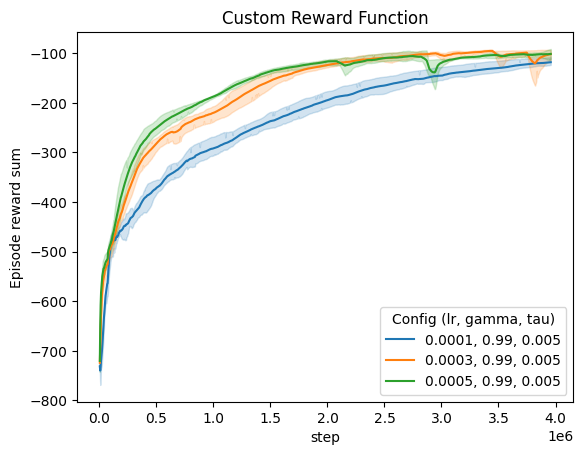

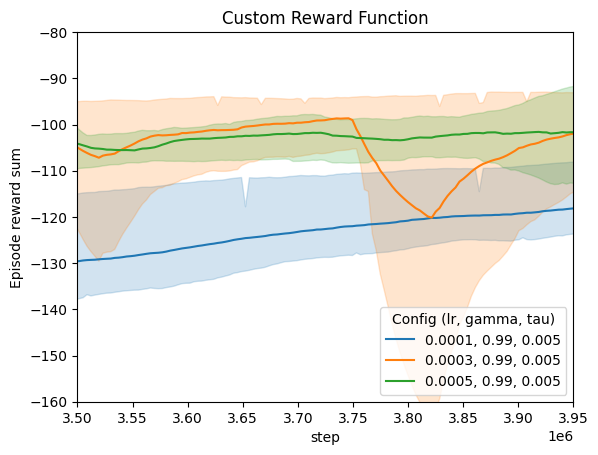

In [7]:
plot(df, "custom", "Custom Reward Function", "relaxed")
plot(df, "custom", "Custom Reward Function", "relaxed", xrange = [3500000, 3950000], yrange = [-160, -80])

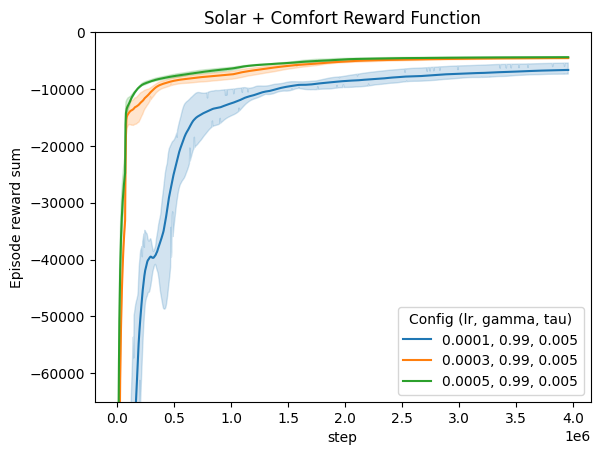

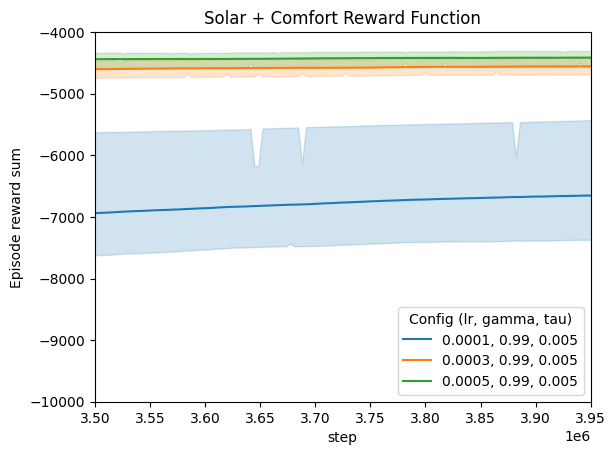

In [14]:
plot(df, "solarcomfort", "Solar + Comfort Reward Function", yrange = [-65000, 0])
plot(df, "solarcomfort", "Solar + Comfort Reward Function", xrange = [3500000, 3950000], yrange= [-10000, -4000])

In [12]:
# plot(df, "customrelaxed", "Relaxed Custom Reward Function")
# plot(df, "customrelaxed", "Relaxed Custom Reward Function", xrange = [3500000, 3950000], yrange = [-7000, 0])

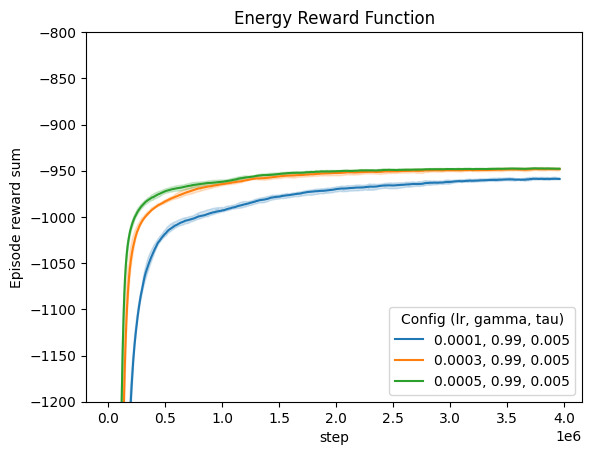

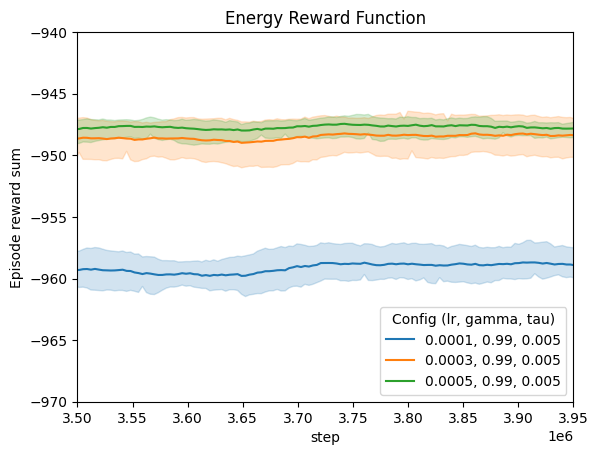

In [15]:
plot(df, "energy", "Energy Reward Function", yrange = [-1200, -800])
plot(df, "energy", "Energy Reward Function", xrange = [3500000, 3950000], yrange = [-970, -940])